# Setup

In [49]:
# import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# Get Data

In [50]:
import pandas as pd

FILE_PATH = "C:/Users/pcadministrador/Desktop/ml_proyecto_1_UCAB/"

def load_housing_data(housing_path=FILE_PATH):
    csv_path = os.path.join(housing_path, "wines.csv")
    return pd.read_csv(csv_path)

La función creada retornará los datos, ahora veremos la estructura de los mismos.

In [51]:
data = load_housing_data()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Usamos la siguiente función para ver los tipos de datos que tiene cada columna

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Ahora veremos la descripción de cada atributo.

In [53]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Como pudimos ver, todos los datos están completos. Ahora veamos el histograma de cada atributo.

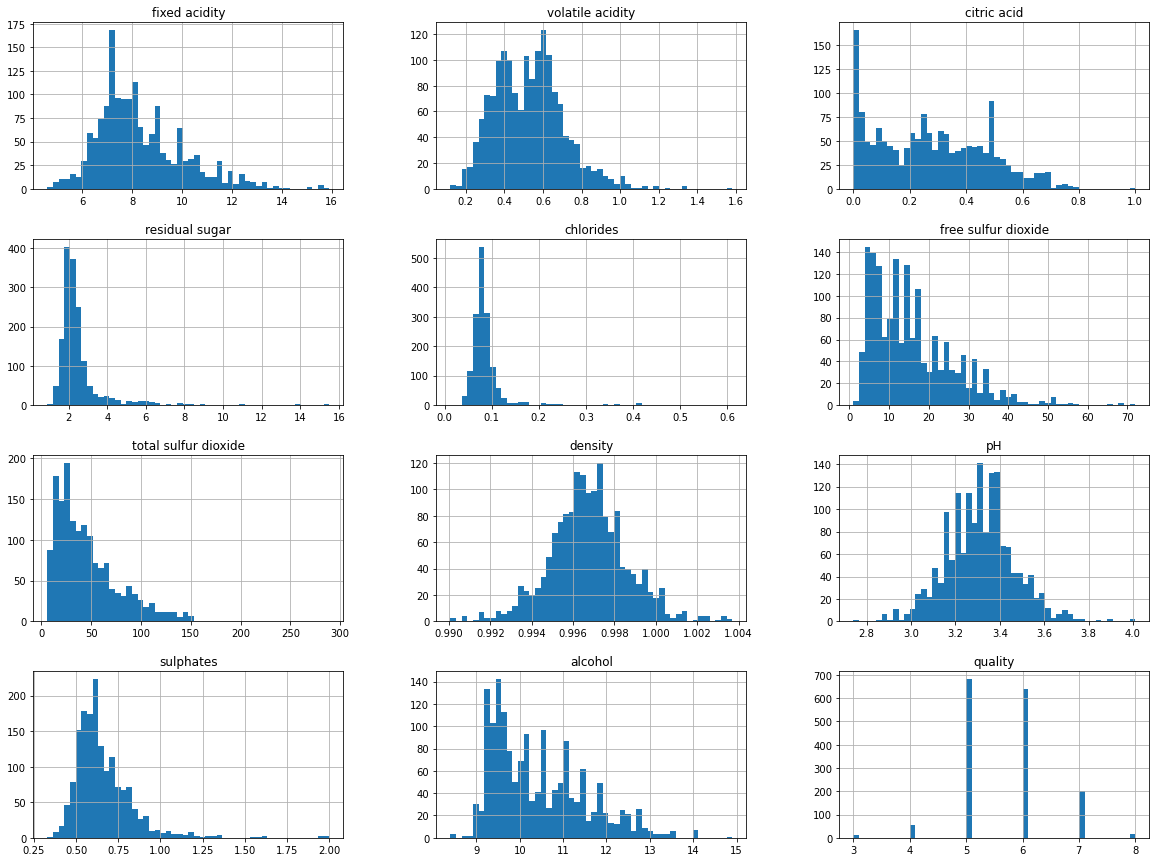

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

# Create a Test Set

Ahora crearemos el conjunto de pruebas

In [55]:
np.random.seed(42)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2)
len(train_set)

1279

In [56]:
len(test_set)

320

Consultamos los datos que tiene nuestro conjunto de prueba

In [57]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


Como nos interesa saber la calidad de los vinos, veremos el histograma de este atributo.

<AxesSubplot:>

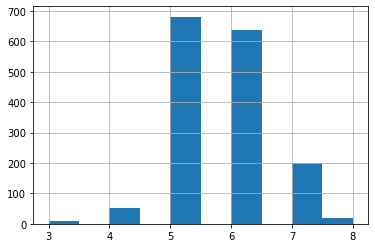

In [58]:
data["quality"].hist()

# Correlations

Ahora le echaremos un vistazo a la correlación entre los atributos

In [59]:
corr_matrix = data.corr()

In [60]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Al ver la correlación de los atributos contra el atributo "quality" podemos sacar que los que tienen mejor correlación son: alcohol, volatile acidity y sulphates

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='quality'>,
        <AxesSubplot:xlabel='sulphates', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='quality', ylabel='sulphates'>,
        <AxesSubplot:xlabel='alcohol', ylabel='sulphates'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='sulphates'>,
        <AxesSubplot:xlabel='sulphates', yl

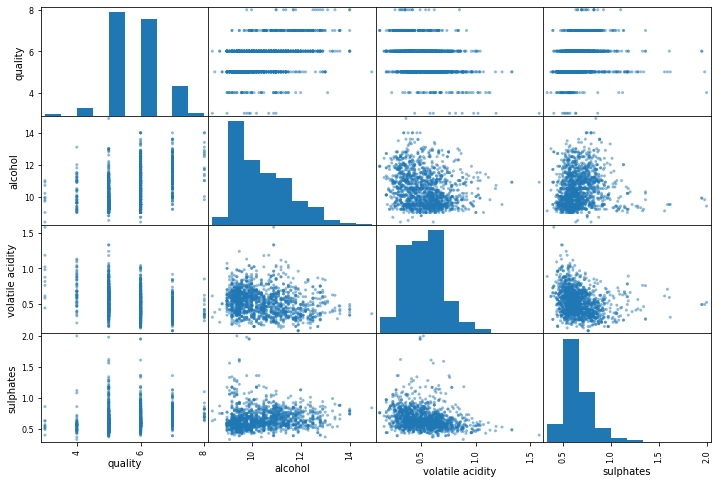

In [61]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "volatile acidity",
              "sulphates"]
scatter_matrix(data[attributes], figsize=(12, 8))

Detallemos la correlación más alta que vendría siendo con respecto al alcohol

(8.0, 15.0, 3.0, 8.0)

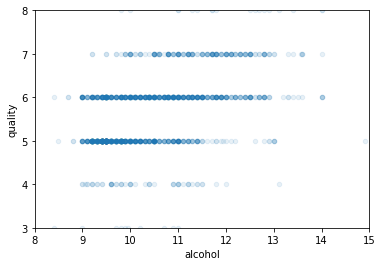

In [62]:
data.plot(kind="scatter", x="alcohol", y="quality",
             alpha=0.1)
plt.axis([8, 15, 3, 8])

# Select and Train a Model

Ahora entremos el modelo

In [81]:
data = train_set.drop("quality", axis=1)
data_labels = train_set["quality"].copy()

Usando Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data, data_labels)

LinearRegression()

In [65]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]

print("Predictions:", lin_reg.predict(data))

Predictions: [5.68864364 6.05664943 5.69269687 ... 4.9703554  6.61115563 6.69768634]


In [66]:
print("Labels:", list(some_labels))

Labels: [6, 6, 6, 5, 5]


In [67]:
some_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


Ahora veamos el error

In [82]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6512995910592837

In [69]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

0.4996196411485793

Probemos ahora nuestro modelo usando un Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data, data_labels)

DecisionTreeRegressor(random_state=42)

Veamos nuevamente el error:

In [71]:
data_predictions = tree_reg.predict(data)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Apliquemos un cross validation

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.76546554 0.8291562  0.8149003  0.66143783 0.81967982 0.87052427
 0.74477346 0.81009259 0.63737744 0.86488814]
Mean: 0.7818295576255861
Standard deviation: 0.07571784749502239


In [73]:
lin_scores = cross_val_score(lin_reg, data, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62576397 0.71661737 0.69198217 0.70092111 0.67935552 0.67375579
 0.66745333 0.67890987 0.49594792 0.64828114]
Mean: 0.657898818692708
Standard deviation: 0.05921004161564612


In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data, data_labels)

RandomForestRegressor(random_state=42)

In [75]:
data_predictions = forest_reg.predict(data)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.21857452752165227

In [76]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.60569756 0.66778376 0.63279576 0.5687136  0.60622809 0.62486874
 0.55108629 0.67244656 0.45849022 0.56474926]
Mean: 0.5952859833212866
Standard deviation: 0.06002100706882078


In [77]:
scores = cross_val_score(lin_reg, data, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.657899
std       0.062413
min       0.495948
25%       0.653074
50%       0.676333
75%       0.688826
max       0.716617
dtype: float64

In [78]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data, data_labels)
data_predictions = svm_reg.predict(data)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.6572706440159496